In [1]:
import sys
import seaborn as sns
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import avalanches as crfn
import admin_functions as adfn
from scipy import stats 
import IS as isfn

sns.reset_orig()
#plt.style.use('dark_background')

%load_ext autoreload
%autoreload

# Define paths
#---------------------------------------------------------------------------
Fdrop = '/Users/dominicburrows/Dropbox/PhD/analysis/'
Fmac = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'
Ftm = '/Volumes/Dominic Time Machine/'

# Baseline - PTZ avalanches

In [2]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*BLN*_av.npy*'))

p5list = sorted(glob.glob('*PTZ05*_av.npy*'))

p20list = sorted(glob.glob('*PTZ20*_av.npy*'))
blnlist, p5list, p20list

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_av.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_av.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ05_run-01_av.npy',
  'PTZ-WILDTYPE-09_2photon_

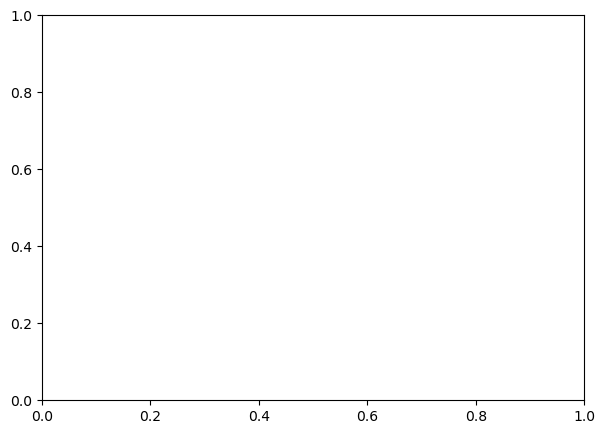

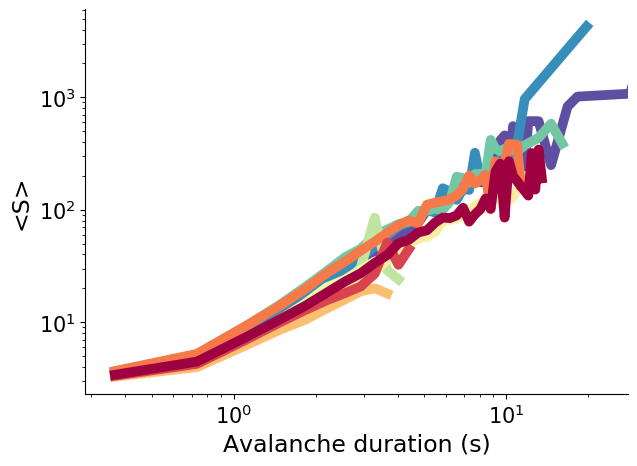

In [6]:
fig, axarr = plt.subplots(figsize = (7,5))
import matplotlib
from matplotlib import cm
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$']


sizelist, durlist = list(range(len(blnlist))),list(range(len(blnlist)))

for i in range(len(blnlist)):    
    avsize = np.load(blnlist[i])[0]
    avdur = (1/2.73)*np.load(blnlist[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_ylabel('<S>', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

axarr.set_xticklabels(labels, size = 15)
plt.yticks(size = 15)

plt.xlim(right = 28)  
#plt.ylim(top = 10000)  

plt.savefig(Ffig + 'av_sizexdur.svg', transparent = True)
plt.show()

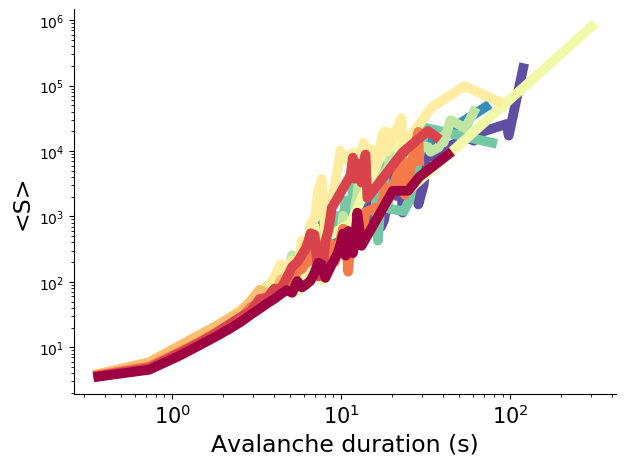

In [10]:
fig, axarr = plt.subplots(figsize = (7,5))
import matplotlib
from matplotlib import cm
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
axarr.set_prop_cycle('color', colors)
colors  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
labels = ['10$^1$','10$^1$','10$^0$','10$^1$','10$^2$']


sizelist, durlist = list(range(len(blnlist))),list(range(len(blnlist)))

for i in range(len(blnlist)):    
    avsize = np.load(p20list[i])[0]
    avdur = (1/2.73)*np.load(p20list[i])[1]
    sizevec, durvec = [],[]
    for e in np.unique(avdur):
        sizevec = np.append(sizevec, np.mean(avsize[np.where(avdur == e)]))  
        durvec = np.append(durvec, e)
    sizelist[i], durlist[i] = sizevec, durvec
for i in range(len(sizelist)):
    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, alpha = 1, c = colors[i])
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.set_ylabel('<S>', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)

axarr.set_xticklabels(labels, size = 15)
#plt.ylim(top = 10000)  

plt.savefig(Ffig + 'av_sizexdur.svg', transparent = True)
plt.show()

In [5]:
def marglik_power_loglik(data, npart):
    import numpy as np
    #Size
    sizes=data[0,:]
    M=len(sizes)
    a=min(sizes) #define xmin
    b=max(sizes) #define xmax
    size_ln=isfn.IS_LN(npart, sizes, M, a, b)
    size_po=isfn.IS(npart, sizes, M, a, b)
    
    #Dur
    sizes=data[1,:]
    a=2 #define xmin
    b=max(sizes) #define xmax
    M=len(sizes[np.where(sizes>a-1)])
    dur_ln=isfn.IS_LN(npart, sizes, M, a, b)
    dur_po=isfn.IS(npart, sizes, M, a, b)
    return(size_po, dur_po, size_ln, dur_ln)

In [12]:
av = np.load(blnlist[1])
av

array([[10,  3,  7, ...,  5,  4,  3],
       [ 2,  1,  2, ...,  1,  1,  1]])

2.542810827310123 3.0869493076177856 1.554566028813407 1.3526929359553195


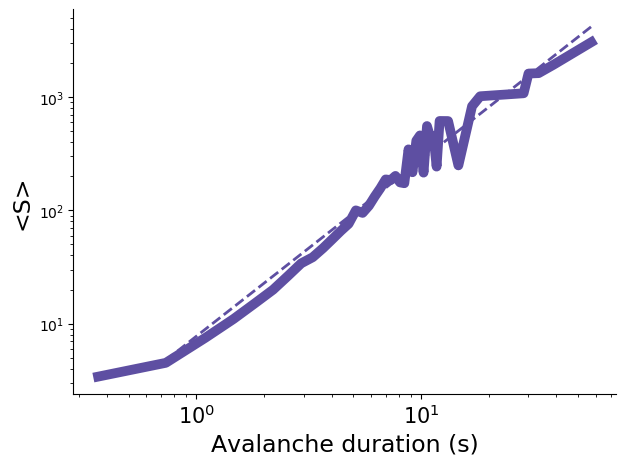

2.551440598561409 3.242436415017688 1.649027875220253 1.445389799066115


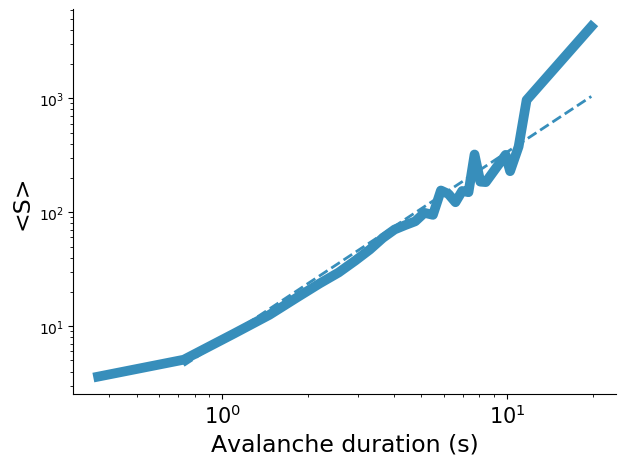

2.628839435431887 3.271738665747016 1.4873981251648003 1.394697731605856


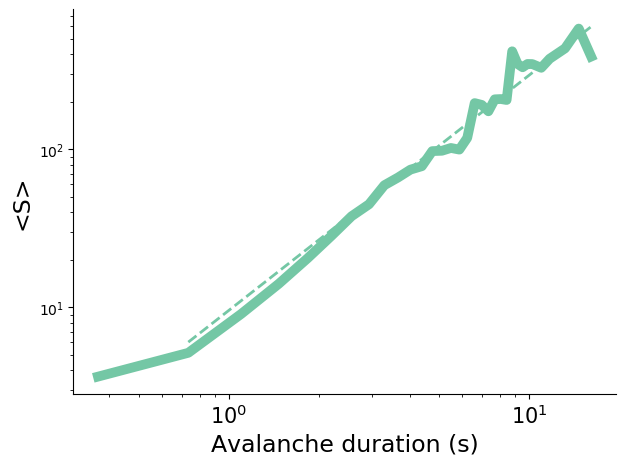

3.392605034875329 4.0961501532209565 1.1494745363352408 1.2940498360951944


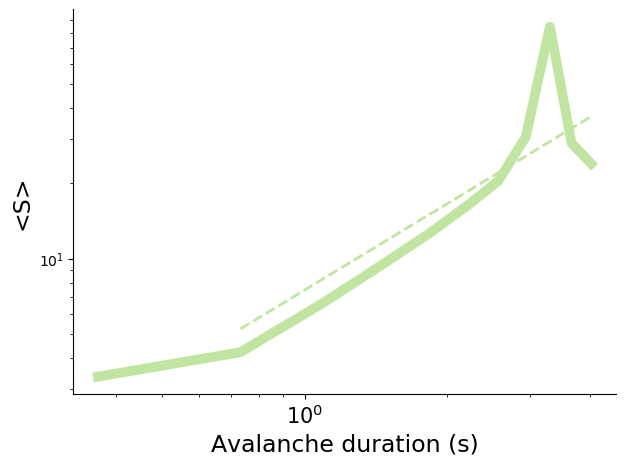

3.2814498214623153 3.816357767615156 1.2378545192432928 1.234459658556061


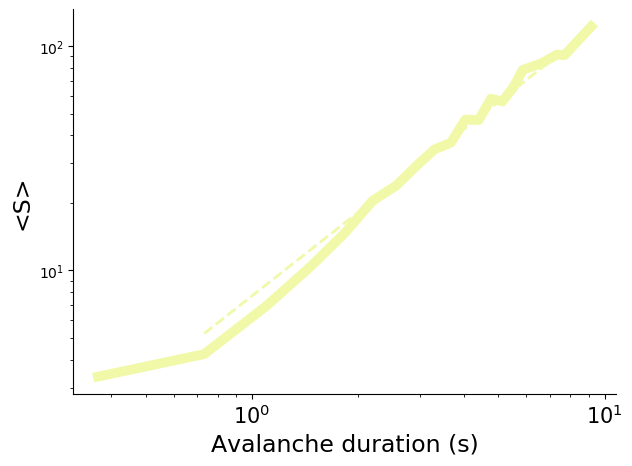

3.0398471280389443 3.4354354720594444 1.3100708711952154 1.1939303875191905


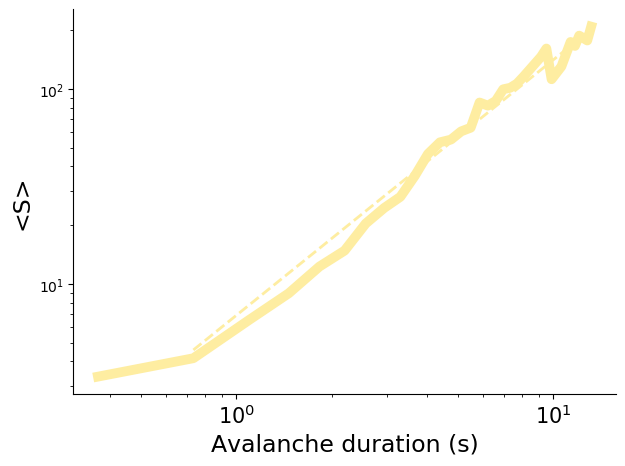

3.7568521651078806 4.391129758736401 0.8780780142046153 1.2300731253043813


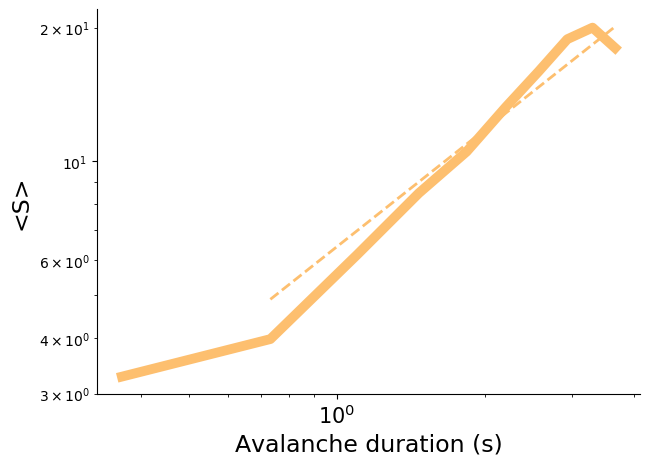

2.7047086698668026 3.400246428068503 1.3855132266402814 1.4080097499920887


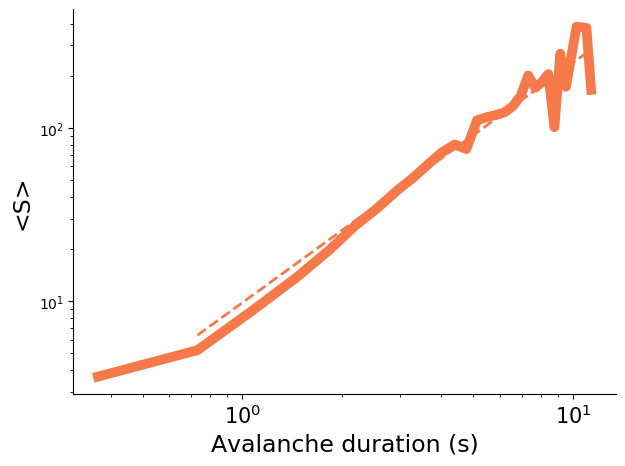

3.2091841651511666 3.8975895003466894 1.1193083435073103 1.3116106597425379


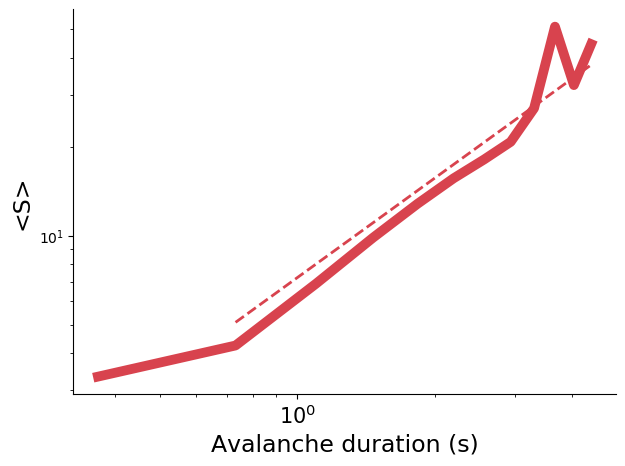

2.6706361617588192 3.1959438145697754 1.3184939868578451 1.3144357011031778


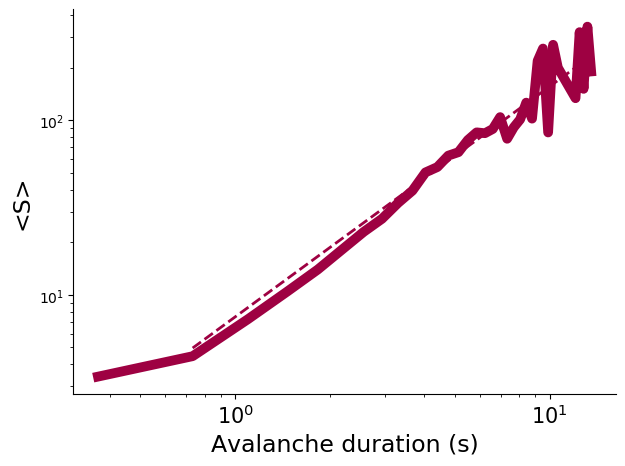

In [7]:
gam_list = list(range(len(blnlist)))
for i in range(len(blnlist)):
    av = np.load(blnlist[i])
    av_size = av[0]
    av_dur = av[1]
    ml = marglik_power_loglik(av, 2000)
    size_e = ml[0][0]
    dur_e = ml[1][0]
    fig, axarr = plt.subplots(figsize = (7,5))
    av_size = av_size
    av_dur = (1/2.73)*av_dur

    size_vec, dur_vec = [],[]
    for e in np.unique(av_dur):
        size_vec = np.append(size_vec, np.mean(av_size[np.where(av_dur == e)])) 
        dur_vec = np.append(dur_vec, e)

    xaxis = np.unique(dur_vec)
    yaxis = size_vec
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1)
    fit_beta,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1]), np.log10(yaxis[:len(xaxis)-1]), 1)
    plt.close(fig)
    pred_beta = (dur_e - 1)/(size_e - 1)
    print(size_e, dur_e, fit_beta, pred_beta)
    
    fig, axarr = plt.subplots(figsize = (7,5))

    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, alpha = 1, c = colors[i])
    m = fit_beta
    y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    plt.plot(xaxis[:len(xaxis)-1][1:], y_fit[:len(xaxis)-1][1:], linestyle = '--', linewidth = 2, c = colors[i], alpha = 1)
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_xlabel('Avalanche duration (s)', size = '17')
    axarr.set_ylabel('<S>', size = '17')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    gam_list[i] = fit_beta
    axarr.set_xticklabels(labels, size = 15) 
    plt.show()

In [12]:
np.mean(gam_list)

2.0166194350393285

In [13]:
np.std(gam_list)

0.25697081583579323

2.3392934342003042 2.9138562673433355 1.9566261793242286 1.429004442544814


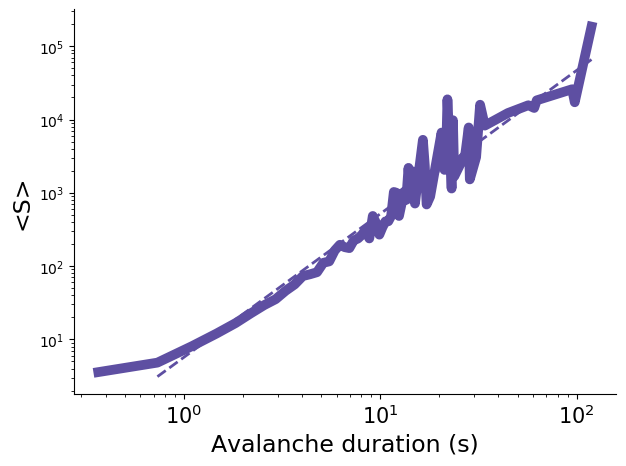

2.567689661567476 3.2777480230344747 2.0703172818092987 1.4529329872323309


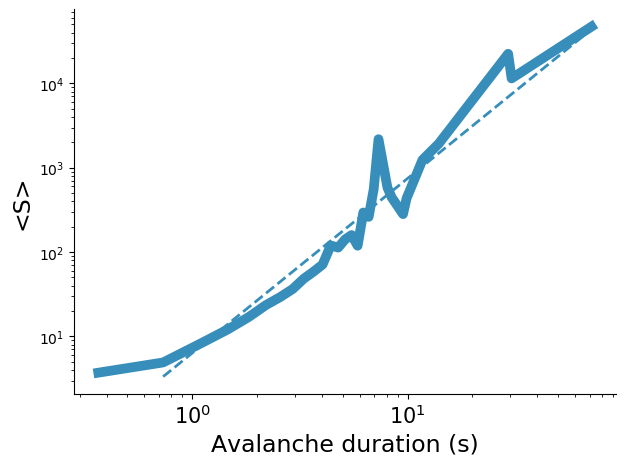

2.449773814175638 3.1193272503755463 1.9750162835260723 1.4618330319206558


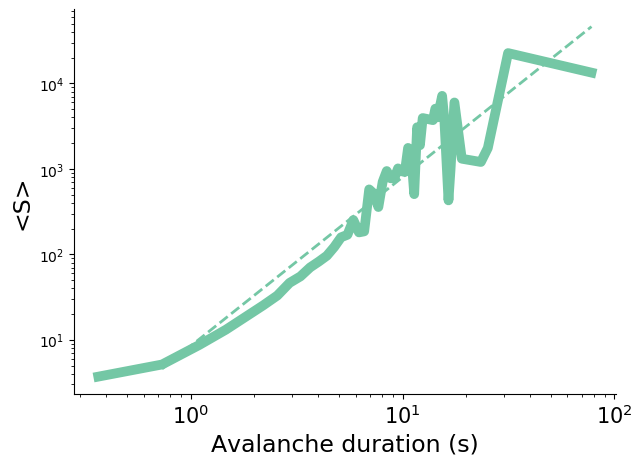

2.6319352624309342 3.468126692935074 2.15114835356275 1.5123925254599544


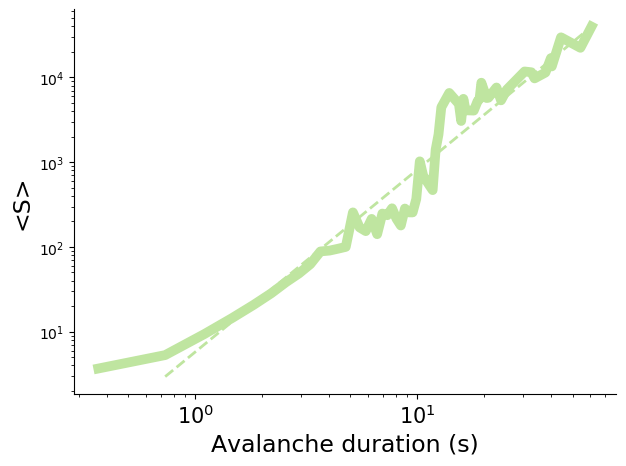

2.742623042542477 3.613260397948283 2.035279295734585 1.4996131315557213


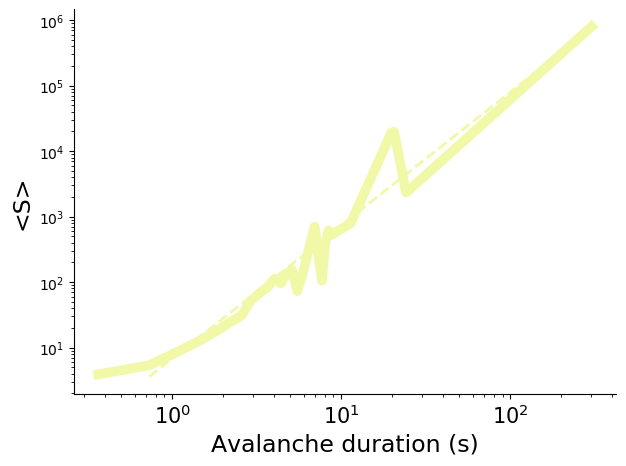

2.5478790713679085 3.4442016948002196 2.4838635716232305 1.5790650187163544


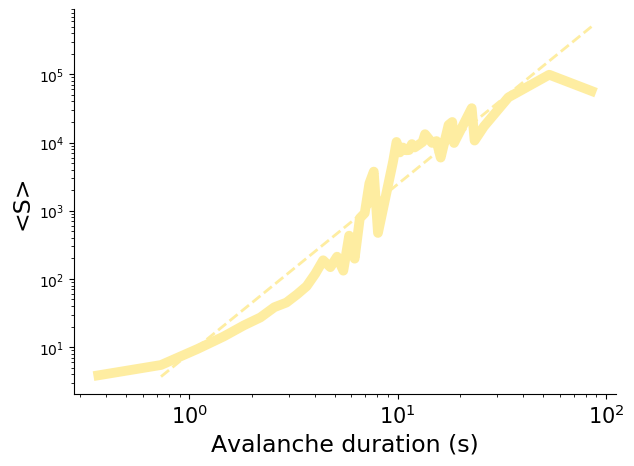

2.79595973053915 3.954014149944516 1.506341295697262 1.6448109051185218


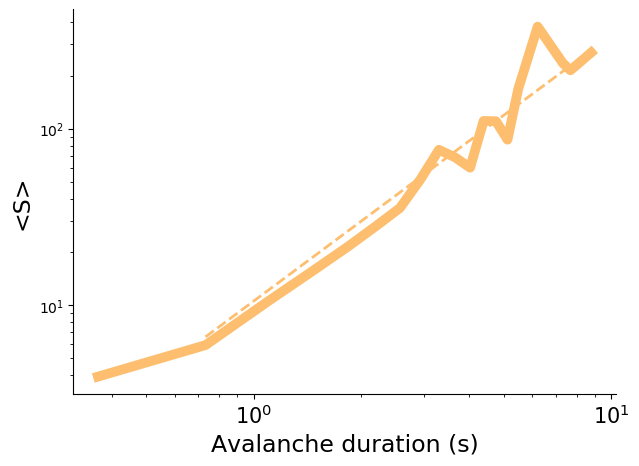

2.450842337408872 3.0186154608342597 1.9097472832944193 1.3913403329815976


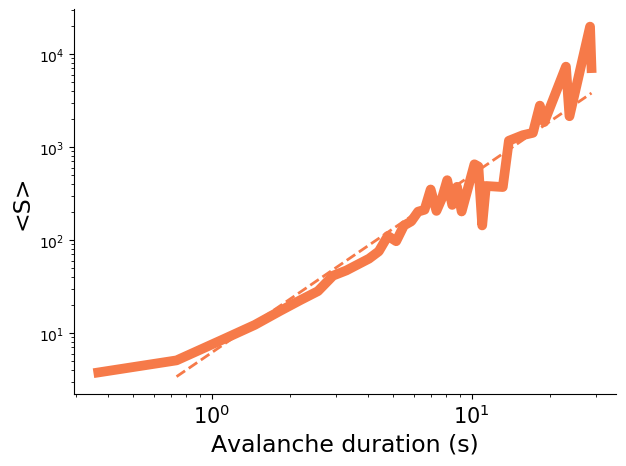

2.6837409886978425 3.3875003851440177 2.3059128889917937 1.4179736676663333


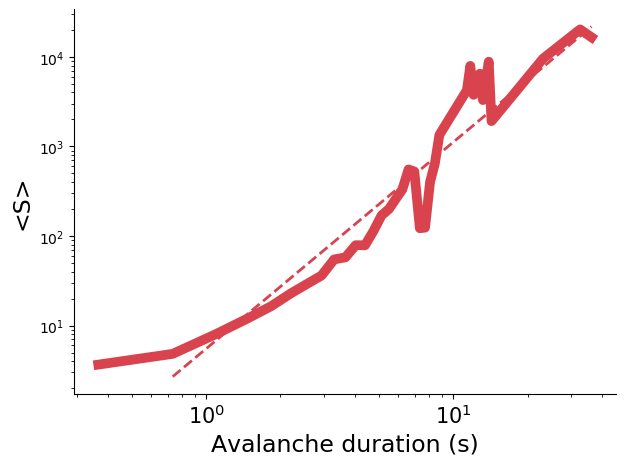

2.3538900539479632 2.8375100394178268 1.7719419168296473 1.3572077245560823


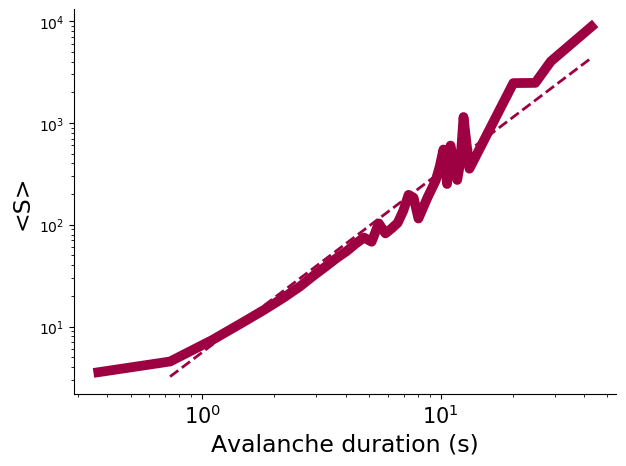

In [11]:
for i in range(len(blnlist)):
    av = np.load(p20list[i])
    av_size = av[0]
    av_dur = av[1]
    ml = marglik_power_loglik(av, 2000)
    size_e = ml[0][0]
    dur_e = ml[1][0]
    fig, axarr = plt.subplots(figsize = (7,5))
    av_size = av_size
    av_dur = (1/2.73)*av_dur

    size_vec, dur_vec = [],[]
    for e in np.unique(av_dur):
        size_vec = np.append(size_vec, np.mean(av_size[np.where(av_dur == e)])) 
        dur_vec = np.append(dur_vec, e)

    xaxis = np.unique(dur_vec)
    yaxis = size_vec
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1)
    fit_beta,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1]), np.log10(yaxis[:len(xaxis)-1]), 1)
    plt.close(fig)
    pred_beta = (dur_e - 1)/(size_e - 1)
    print(size_e, dur_e, fit_beta, pred_beta)
    
    fig, axarr = plt.subplots(figsize = (7,5))

    xaxis = np.unique(durlist[i])
    yaxis = sizelist[i]
    axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 7, alpha = 1, c = colors[i])
    m = fit_beta
    y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
    plt.plot(xaxis[:len(xaxis)-1][1:], y_fit[:len(xaxis)-1][1:], linestyle = '--', linewidth = 2, c = colors[i], alpha = 1)
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    axarr.set_xlabel('Avalanche duration (s)', size = '17')
    axarr.set_ylabel('<S>', size = '17')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    axarr.set_xticklabels(labels, size = 15) 
    gam_list[i] = fit_beta

    plt.show()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
av_size = av[0]
av_dur = av[1]
ml = marglik_power_loglik(av, 2000)
size_e = ml[0][0]
dur_e = ml[1][0]
fig, axarr = plt.subplots(figsize = (7,5))
av_size = av_size
av_dur = (1/2.73)*av_dur

size_vec, dur_vec = [],[]
for e in np.unique(av_dur):
    size_vec = np.append(size_vec, np.mean(av_size[np.where(av_dur == e)])) 
    dur_vec = np.append(dur_vec, e)

xaxis = np.unique(dur_vec)
yaxis = size_vec
axarr.plot(xaxis[:len(xaxis)-1], yaxis[:len(xaxis)-1], '-', linewidth = 1.5, alpha = 1)
fit_beta,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1]), np.log10(yaxis[:len(xaxis)-1]), 1)
plt.close(fig)

pred_beta = (dur_e - 1)/(size_e - 1)
dcc = np.abs(fit_beta - pred_beta)
return(dcc, size_e, dur_e)

In [234]:
choose= 0
bln_distlist = [np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p5_distlist = [np.load(p5list[i])[choose] for i in range(len(p5list))]
p20_distlist = [np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p5_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    p5_vec = np.append(p5_vec, p5_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
tot_vec = []
full_list = [bln_vec, p5_vec, p20_vec]
for e in range(len(full_list)):
    tot_vec = np.append(tot_vec, full_list[e])
    
fig, axarr = plt.subplots(figsize = (7,5))
bln_histlist = list(range(len(bln_distlist)))
p5_histlist = list(range(len(bln_distlist)))
p20_histlist = list(range(len(bln_distlist)))

mini = np.min(tot_vec)
maxi = np.max(tot_vec)
bins = 10000

for i in range(len(bln_distlist)):    
    bln_histlist[i] = axarr.hist(bln_distlist[i], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[0]

for i in range(len(p5_distlist)):    
    p5_histlist[i] = axarr.hist(p5_distlist[i], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[0]

for i in range(len(p20_distlist)):    
    p20_histlist[i] = axarr.hist(p20_distlist[i], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[0]

yaxis = axarr.hist(bln_distlist[0], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[1][:bins]

plt.close(fig) 

In [115]:
minus

array([1.00000000e+00, 1.58705663e-05, 2.89394986e-06, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

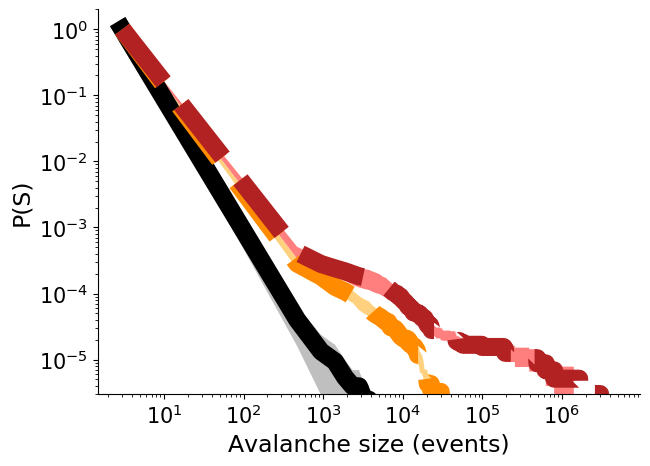

In [235]:
from scipy import stats
import matplotlib

fig, axarr = plt.subplots(figsize = (7,5))  

stop = 9
xaxis = np.mean(bln_histlist, axis= 0)
sem = stats.sem(bln_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='grey',alpha=0.5,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'k', linewidth = 13)

stop = 50
xaxis = np.mean(p5_histlist, axis= 0)
sem = stats.sem(p5_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0.
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='orange',alpha=0.5,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'darkorange', linewidth = 13, linestyle= '--')

stop = 3000
xaxis = np.mean(p20_histlist, axis= 0)
sem = stats.sem(p20_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus, facecolor='red',alpha=0.5,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'firebrick', linewidth = 13, linestyle = '--')


axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_xscale('log')
axarr.set_yscale('log')
#plt.xlim(right = 1000000)  
plt.ylim(bottom = 0.000003)  
axarr.set_ylabel('P(S)', size = '17')
axarr.set_xlabel('Avalanche size (events)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.yticks(size = 15)
plt.xticks(size = 15)
plt.savefig(Ffig + 'avsize_ptz_mean.svg', transparent = True)
plt.show()

In [230]:
choose= 1
bln_distlist = [(1/2.73)*np.load(blnlist[i])[choose] for i in range(len(blnlist))]
p5_distlist = [(1/2.73)*np.load(p5list[i])[choose] for i in range(len(p5list))]
p20_distlist = [(1/2.73)*np.load(p20list[i])[choose] for i in range(len(p20list))]
bln_vec = []
p5_vec = []
p20_vec = []
for i in range(len(bln_distlist)):
    bln_vec = np.append(bln_vec, bln_distlist[i])
    p5_vec = np.append(p5_vec, p5_distlist[i])
    p20_vec = np.append(p20_vec, p20_distlist[i])
    
tot_vec = []
full_list = [bln_vec, p5_vec, p20_vec]
for e in range(len(full_list)):
    tot_vec = np.append(tot_vec, full_list[e])
    
fig, axarr = plt.subplots(figsize = (7,5))
bln_histlist = list(range(len(bln_distlist)))
p5_histlist = list(range(len(bln_distlist)))
p20_histlist = list(range(len(bln_distlist)))

mini = np.min(tot_vec)
maxi = np.max(tot_vec)
bins = 1000

for i in range(len(bln_distlist)):    
    bln_histlist[i] = axarr.hist(bln_distlist[i], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[0]

for i in range(len(p5_distlist)):    
    p5_histlist[i] = axarr.hist(p5_distlist[i], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[0]

for i in range(len(p20_distlist)):    
    p20_histlist[i] = axarr.hist(p20_distlist[i], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[0]

yaxis = axarr.hist(bln_distlist[0], bins=bins, range = (mini, maxi), density=True, histtype='step', linewidth = 3, cumulative=-1, color = 'k')[1][:bins]

plt.close(fig) 

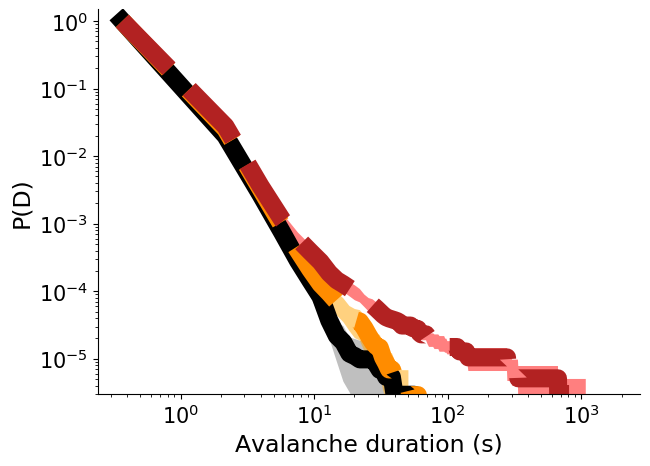

In [233]:
from scipy import stats
import matplotlib

fig, axarr = plt.subplots(figsize = (7,5))  

stop = 22
xaxis = np.mean(bln_histlist, axis= 0)
sem = stats.sem(bln_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='grey',alpha=0.5,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'k', linewidth = 13)


stop = 29
xaxis = np.mean(p5_histlist, axis= 0)
sem = stats.sem(p5_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0.
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus,facecolor='orange',alpha=0.5,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'darkorange', linewidth = 13, linestyle= '--')

stop = 600
xaxis = np.mean(p20_histlist, axis= 0)
sem = stats.sem(p20_histlist)
minus = (xaxis-(sem))[:stop]
#minus [minus < 0.00001] = 0
plus = (xaxis+(sem))[:stop]
plt.fill_between(yaxis[:stop], minus, plus, facecolor='red',alpha=0.5,linewidth = 0)
hist = plt.plot(yaxis, xaxis, c = 'firebrick', linewidth = 13, linestyle = '--')

axarr.set_xscale('log')
axarr.set_yscale('log')
plt.yticks(size = 15)
plt.xticks(size = 15)

#plt.xlim(right = 1000)  
plt.ylim(top = 1.5,bottom = 0.000003)  
axarr.set_ylabel('P(D)', size = '17')
axarr.set_xlabel('Avalanche duration (s)', size = '17')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'avdur_ptz_mean.svg', transparent = True)
plt.show()

### Exponent

In [236]:
# Choose path and create lists of coord and trace files
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnavlist = sorted(glob.glob('*bln*av*exponent.npy*'))
p5avlist = sorted(glob.glob('*PTZ05*av*exponent.npy*'))
p20avlist = sorted(glob.glob('*PTZ20*av*exponent.npy*'))
blnavlist, p5avlist, p20avlist

(['bln_av_exponent.npy'], ['PTZ05_av_exponent.npy'], ['PTZ20_av_exponent.npy'])

In [237]:
bln_exp = np.load(blnavlist[0])
p5_exp = np.load(p5avlist[0])
p20_exp = np.load(p20avlist[0])

In [13]:
bln_exp, p5_exp, p20_exp = np.zeros((len(blnavlist),2)),np.zeros((len(blnavlist),2)),np.zeros((len(blnavlist),2))
for i in range(len(blnavlist)):
    bln = crfn.marglik_power_loglik(np.load(blnavlist[i]), 2000)
    p5 = crfn.marglik_power_loglik(np.load(p5avlist[i]), 2000)
    p20 = crfn.marglik_power_loglik(np.load(p20avlist[i]), 2000)

    bln_exp[i,0],bln_exp[i,1] = bln[0][0], bln[1][0]
    p5_exp[i,0],p5_exp[i,1] = p5[0][0], p5[1][0]
    p20_exp[i,0],p20_exp[i,1] = p20[0][0], p20[1][0]

    print('Done ' + str(i))

Done 0


In [240]:
#SIZE - KS
exp = np.zeros((30))

bln_exp = np.append(np.load(blnavlist[0])[:,0][0],np.load(blnavlist[0])[:,0][2:])
p5_exp = np.append(np.load(p5avlist[0])[:,0][0],np.load(p5avlist[0])[:,0][2:])
p20_exp = np.append(np.load(p20avlist[0])[:,0][0],np.load(p20avlist[0])[:,0][2:])


avlist = [bln_exp, p5_exp, p20_exp]
fli = list(range(10))
flist=[]
for i in range(10):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

sizexdf = {}
count=0
for i in range(len(avlist)):
    for y in range(10):
        exp[count] = avlist[i][y]
        count+=1
sizexdf = pd.DataFrame({"Exponent":exp , "Labels":  np.append(adfn.repeat_list('Baseline',10),np.append(adfn.repeat_list('PTZ 5mM',10),adfn.repeat_list('PTZ 20mM',10))), "Fish":flist})

In [ ]:
import matplotlib 
import seaborn as sns
colors = ['black', 'turquoise','cyan', 'violet']
sns.set(style="white")
fig, ax = plt.subplots(figsize = (4,5))

ax = sns.stripplot(x="Labels", y="BR", data=br_df, hue = 'Col', palette = col_list, jitter = True, size = 16, alpha = 1)
#plt.hlines(np.mean(branchdf['branch ratio']), -0.02 ,0.02, linestyle = '-', color = 'k', lw=4.5)
plt.hlines(1, -0.5 ,3.5, color = 'grey',  linestyle = '--', linewidth = 2, zorder = 1)
ax.set_ylabel('σ', size = '17')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '20')
ax.legend_.remove()
plt.ylim(0.4,1.6)
plt.savefig(Ffig + 'null_BR.svg', transparent = True)
plt.show()

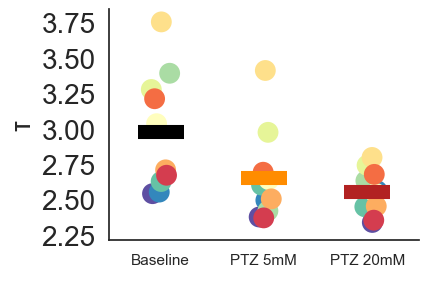

In [252]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']

fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="Exponent", data = sizexdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=sizexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data=sizexdf, hue = 'Fish', palette = colors1, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('τ', size = '20')
plt.yticks(size = 20)
#ax.set_xticklabels(['Spontaneous', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'exp_size_ptz.svg', transparent = True)
plt.show()

In [27]:
bln_size = sizexdf[sizexdf['Labels'] == 'Baseline']
p5_size = sizexdf[sizexdf['Labels'] == 'PTZ 5mM']
p20_size = sizexdf[sizexdf['Labels'] == 'PTZ 20mM']

exp_list = bln_size, p5_size, p20_size

In [28]:
from scipy import stats
data = bln_size['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

2.9779459865185376 0.13274353749810144


In [29]:
from scipy import stats
data = p5_size['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

2.6490221124674878 0.10232852424142291


In [30]:
from scipy import stats
data = p20_size['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

2.5550295204977638 0.04991228233032427


In [31]:
for i in range(len(exp_list)):
    p = stats.normaltest(exp_list[i]['Exponent'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [32]:
from scipy.stats import wilcoxon
alpha = 0.05/3

w, p = wilcoxon(bln_size['Exponent'], p5_size['Exponent'], mode='auto')
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 0.0   p = 0.001953125
Samples are significantly different


In [33]:
#BLN - PTZ20
alpha = 0.05/3

t, p = stats.ttest_rel(bln_size['Exponent'], p20_size['Exponent'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 4.589020039183812   p = 0.0013108571297495517
Samples are significantly different


In [34]:
from scipy.stats import wilcoxon
alpha = 0.05/3

w, p = wilcoxon(p5_size['Exponent'], p20_size['Exponent'], mode='auto')
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 13.0   p = 0.16015625
Samples are the same


In [253]:
#SIZE - KS
exp = np.zeros((30))

bln_exp = np.append(np.load(blnavlist[0])[:,1][0],np.load(blnavlist[0])[:,1][2:])
p5_exp = np.append(np.load(p5avlist[0])[:,1][0],np.load(p5avlist[0])[:,1][2:])
p20_exp = np.append(np.load(p20avlist[0])[:,1][0],np.load(p20avlist[0])[:,1][2:])


avlist = [bln_exp, p5_exp, p20_exp]
fli = list(range(10))
flist=[]
for i in range(10):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

durexdf = {}
count=0
for i in range(len(avlist)):
    for y in range(10):
        exp[count] = avlist[i][y]
        count+=1
durexdf = pd.DataFrame({"Exponent":exp , "Labels":  np.append(adfn.repeat_list('Baseline',10),np.append(adfn.repeat_list('PTZ 5mM',10),adfn.repeat_list('PTZ 20mM',10))), "Fish":flist})

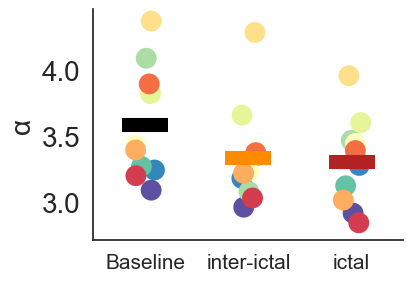

In [256]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")

colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']
fig, ax = plt.subplots(figsize = (4,3))
ax = sns.pointplot(x="Labels", y="Exponent", data = durexdf, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Exponent", data=durexdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Exponent", data=durexdf, hue = 'Fish', palette = colors1, size = 15, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('α', size = '20')
plt.yticks(size = 20)
ax.set_xticklabels(['Baseline', 'inter-ictal', 'ictal'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'exp_dur_ptz.svg', transparent = True)
plt.show()

In [37]:
bln_dur = durexdf[durexdf['Labels'] == 'Baseline']
p5_dur = durexdf[durexdf['Labels'] == 'PTZ 5mM']
p20_dur = durexdf[durexdf['Labels'] == 'PTZ 20mM']

exp_list = bln_dur, p5_dur, p20_dur

In [38]:
from scipy import stats
data = bln_dur['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

3.5825245807181125 0.13798210981440143


In [39]:
from scipy import stats
data = p5_dur['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

3.3374271761125427 0.12338381449081703


In [40]:
from scipy import stats
data = p20_dur['Exponent']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

3.3039589597266654 0.10860921996153089


In [41]:
for i in range(len(exp_list)):
    p = stats.normaltest(exp_list[i]['Exponent'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample does not look Gaussian (reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [42]:
from scipy.stats import wilcoxon
alpha = 0.05/3

w, p = wilcoxon(bln_dur['Exponent'], p5_dur['Exponent'], mode='auto')
print('w = ' + str(w) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

w = 2.0   p = 0.005859375
Samples are significantly different


In [43]:
#BLN - PTZ20
alpha = 0.05/3

t, p = stats.ttest_rel(bln_dur['Exponent'], p20_dur['Exponent'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 4.057204891142796   p = 0.0028538918279925013
Samples are significantly different


In [44]:
#BLN - PTZ20
alpha = 0.05/3

t, p = stats.ttest_rel(p5_dur['Exponent'], p20_dur['Exponent'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = 0.4806566738137171   p = 0.642229014308055
Samples are the same


# DCC

In [3]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
savepath = Fdrop + 'Project/' + experiment + os.sep 
os.chdir(Fdrop + 'Project/' + experiment)
bln_dcc = sorted(glob.glob('*BLN*DCC.npy*')) 
p5_dcc = sorted(glob.glob('*_PTZ05*DCC.npy*')) 
p20_dcc = sorted(glob.glob('*_PTZ20*DCC.npy*')) 
bln_dcc

['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-06_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01-DCC.npy',
 'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09-DCC.npy']

In [302]:
dcc = np.zeros((30))
dcc_list = [bln_dcc, p5_dcc, p20_dcc]
fli = list(range(10))
flist=[]
for i in range(10):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)
    
count=0
for i in range(len(dcc_list)):
    for y in range(10):
        dcc[count] = np.load(dcc_list[i][y] ,allow_pickle=True)
        count+=1
dcc_df = pd.DataFrame({"DCC":dcc , "Labels":  np.append(adfn.repeat_list('Baseline',10),np.append(adfn.repeat_list('PTZ 5mM',10),adfn.repeat_list('PTZ 20mM',10))), "Fish":flist})

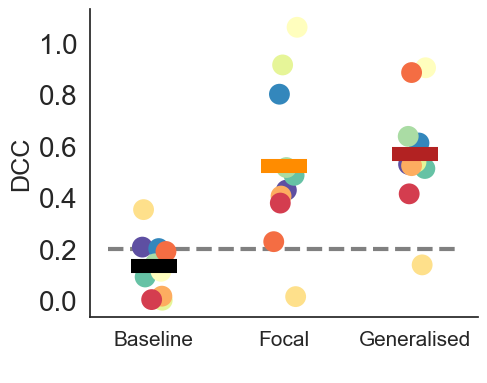

In [306]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,11))
colors2 = ['black','darkorange','firebrick']
fig, ax = plt.subplots(figsize = (5,4))
ax = sns.pointplot(x="Labels", y="DCC", data = dcc_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=5, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="DCC", data=dcc_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="DCC", data=dcc_df, hue = 'Fish', palette = colors1, size = 15, jitter = True ,alpha = 1)
plt.hlines(0.2, -0.35 ,2.35, linestyle = '--', color = 'grey', linewidth = 3, zorder = 1)
plt.yticks(size = 20)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('DCC', size = '18')
ax.set_xticklabels(['Baseline', 'Focal', 'Generalised'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'DCC_ptz.svg', transparent = True)
plt.show()

In [50]:
bln_d = dcc_df[dcc_df['Labels'] == 'Baseline']
p5_d = dcc_df[dcc_df['Labels'] == 'PTZ 5mM']
p20_d = dcc_df[dcc_df['Labels'] == 'PTZ 20mM']

dcc_list = bln_d, p5_d, p20_d

In [51]:
from scipy import stats
data = bln_d['DCC']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.13226028743987198 0.03523868402311583


In [52]:
from scipy import stats
data = p5_d['DCC']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.5236664610971633 0.10056043644143767


In [53]:
from scipy import stats
data = p20_d['DCC']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.5694096022394319 0.06959627419084465


In [54]:
for i in range(len(dcc_list)):
    p = stats.normaltest(dcc_list[i]['DCC'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [55]:
#BLN - PTZ5
alpha = 0.05/3

t, p = stats.ttest_rel(bln_d['DCC'], p5_d['DCC'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -3.2421947352744285   p = 0.010123029421069482
Samples are significantly different


In [56]:
#BLN - PTZ20
alpha = 0.05/3

t, p = stats.ttest_rel(bln_d['DCC'], p20_d['DCC'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -5.1474330452863795   p = 0.0006052191342034721
Samples are significantly different


In [57]:
#BLN - PTZ20
alpha = 0.05/3

t, p = stats.ttest_rel(p5_d['DCC'], p20_d['DCC'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -0.5304115670871465   p = 0.6086628155969493
Samples are the same


# Branching ratio

In [261]:
# Create lists of bin
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
b_branchlist = sorted(glob.glob('*rand*branch*'))
pre_branchlist = sorted(glob.glob('*pre*branch*'))
p20_branchlist = sorted(glob.glob('*_ictal*branch*'))
branchlist = [b_branchlist, p20_branchlist]

branchlist

[['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_randbase-branch.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_randbase-branch.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_ictal-branch.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_ictal-branch.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_ictal-branch.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_PTZ20_run-01_ictal-branch.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_PTZ20_run-01_i

In [ ]:
### Recalculate avalanches + branching ratio
bin_list = [bln_blist, pre_blist, p20_blist]
nnb_list = [sub_bln_nnblist, gen_nnblist, gen_nnblist]
savename = ['_randbase-', '_preictal-', '_ictal-']

for e in range(len(bin_list)):
    for i in range(len(bin_list[e])):
        av, pkg = crfn.avalanche(nnb_list[e][i], bin_list[e][i], Fdrop, experiment)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnb_list[e][i]], 'short') + savename[e] + 'av.npy', av)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnb_list[e][i]], 'short') + savename[e] + 'pkg.npy', pkg)
        branch = crfn.branch(pkg, av, Fdrop, experiment)
        np.save(Fdrop + 'Project/' + experiment + os.sep + adfn.name_template([nnb_list[e][i]], 'short') + savename[e] + 'branch.npy', branch)


In [263]:
#BRANCH RATIO
import pandas as pd

branch = np.zeros((18))
count=0
for i in range(len(branchlist)):
    for e in range(len(branchlist[i])):
        branch[count] = np.load(branchlist[i][e])
        count+=1

fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(2):
    flist = np.append(flist, fli)

bdf = pd.DataFrame({"Branching ratio":branch , "Labels":  np.append(adfn.repeat_list('Baseline',9),adfn.repeat_list('Ictal',9)), "Fish":flist})

In [289]:
bdf

,Branching ratio,Labels,Fish
0,0.970164,Baseline,F2
1,1.040517,Baseline,F3
2,1.008990,Baseline,F4
3,0.883596,Baseline,F5
4,0.885978,Baseline,F6
5,0.767851,Baseline,F7
6,0.995872,Baseline,F8
7,0.902416,Baseline,F9
8,0.965005,Baseline,F10
9,1.013185,Ictal,F2


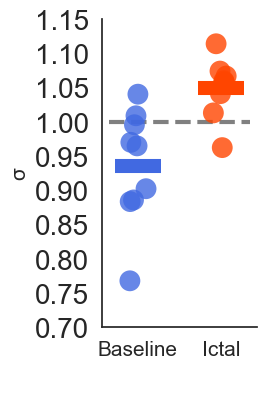

In [300]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
colors = ['royalblue', 'orangered']
fig, ax = plt.subplots(figsize = (2,4))
ax = sns.pointplot(x="Labels", y="Branching ratio", data = bdf, hue = 'Labels', palette = colors, join=True, ci=0, scale=5, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Branching ratio", data = bdf, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Branching ratio", data = bdf, hue = 'Labels', palette = colors, size = 15, jitter = True ,alpha = 0.8)
plt.hlines(1, -0.35 ,1.35, linestyle = '--', color = 'grey', linewidth = 3, zorder = 1)
plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '15')
ax.set_xticklabels(['Baseline', 'Ictal'], size = 15)
ax.legend_.remove()
plt.savefig(Ffig + 'BR_ptz_trans.svg', transparent = True)
plt.ylim(0.7,1.15)
plt.show()

In [129]:
bln_br = bdf[bdf['Labels'] == 'Baseline']
p5_br = bdf[bdf['Labels'] == 'Pre-ictal']
p20_br = bdf[bdf['Labels'] == 'Ictal']

br_list = bln_br, p5_br, p20_br

In [133]:
from scipy import stats
data = bln_br['Branching ratio']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9355987907717268 0.028011230756108885


In [134]:
from scipy import stats
data = p5_br['Branching ratio']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

0.9789975238319636 0.027749473154255633


In [135]:
from scipy import stats
data = p20_br['Branching ratio']
mean = np.mean(data)
sem = stats.sem(data)
print(mean, sem)

1.0496142280749823 0.014088490459070084


In [137]:
for i in range(len(br_list)):
    p = stats.normaltest(br_list[i]['Branching ratio'])[1]
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)
Sample looks Gaussian (fail to reject H0)


/Users/dominicburrows/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [138]:
#BLN - PTZ5
alpha = 0.05/2

t, p = stats.ttest_rel(bln_br['Branching ratio'], p5_br['Branching ratio'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -1.9173472321236325   p = 0.09148904457349134
Samples are the same


In [139]:
#BLN - PTZ20
alpha = 0.05/2

t, p = stats.ttest_rel(bln_br['Branching ratio'], p20_br['Branching ratio'])
print('t = ' + str(t) +  '   p = ' + str(p))
if p > alpha:
    print('Samples are the same')
else:
    print('Samples are significantly different')

t = -3.413689122414859   p = 0.009173019577743528
Samples are significantly different


# Correlation function

In [189]:
# Create lists of bin
#---------------------------------------------------------------------------
experiment = 'PTZ-WILDTYPE'
os.chdir(Fdrop + 'Project/' + experiment)
blnlist = sorted(glob.glob('*randbase*-corrdist_bins*'))
prelist = sorted(glob.glob('*preictal*-corrdist_bins*'))
genlist = sorted(glob.glob('*_ictal*-corrdist_bins*'))
blnlist, prelist, genlist

(['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-07_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-08_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-09_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-10_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-11_2photon_sess-01-6dpf_BLN_run-01_randbase-corrdist_bins.npy',
  'PTZ-WILDTYPE-12_2photon_sess-01-6dpf_BLN_run-09_randbase-corrdist_bins.npy'],
 ['PTZ-WILDTYPE-02_2photon_sess-01-6dpf_PTZ20_run-01_preictal-corrdist_bins.npy',
  'PTZ-WILDTYPE-04_2photon_sess-01-6dpf_PTZ20_run-01_preictal-corrdist_bins.npy',
  'PTZ-WILDTYPE-05_2photon_sess-01-6dpf_PTZ20_run-01_preictal-corrdist_bins.npy',
  'PTZ-WILDTYPE-07_2photon_sess-0

In [ ]:
savepath = Fdrop + 'Project/' + experiment + os.sep 

#Calculate corr-dist binning
for i in range(len(distlist)):
    trace = np.load(tracelist[i])
    corr = np.corrcoef(trace)
    corrdistbin = crfn.corrdis_bin(corr, np.load(distlist[i]), 100)
    np.save(savepath + adfn.save_name(i,distlist) + '_' + '100-corrdist_bins.npy', corrdistbin)
    print('DOne' + str(i))

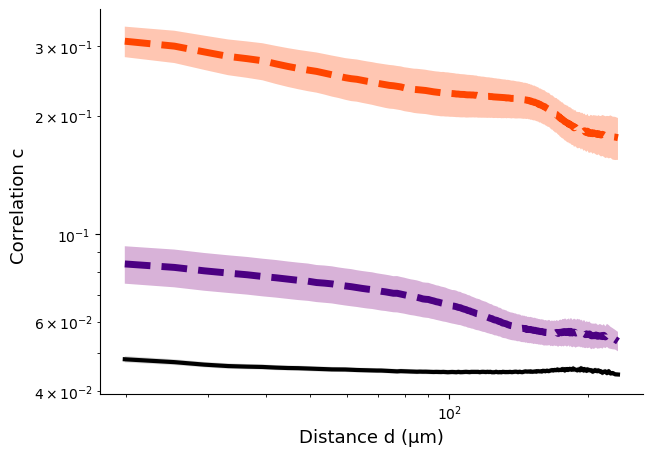

In [226]:
from scipy import stats

bln_distlist = [np.load(blnlist[i])[0][:190] for i in range(len(blnlist))]
pre_distlist = [np.load(prelist[i])[0][:190] for i in range(len(prelist))]
gen_distlist = [np.load(genlist[i])[0][:190] for i in range(len(genlist))]

bln_corrlist = [np.load(blnlist[i])[1][:190] for i in range(len(blnlist))]
pre_corrlist = [np.load(prelist[i])[1][:190] for i in range(len(prelist))]
gen_corrlist = [np.load(genlist[i])[1][:190] for i in range(len(genlist))]

mean_dist = np.mean(np.vstack((gen_distlist,np.vstack((np.vstack(pre_distlist), np.vstack(bln_distlist))))), axis= 0)

listlist = bln_corrlist, pre_corrlist, gen_corrlist
colors = ['black', 'indigo','orangered']
facecolors = ['grey', 'purple','orangered']

lines = ['-', '--', '--']
widths = [3, 5, 5]
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(3):
    sem = stats.sem(listlist[i])
    xaxis = mean_dist*0.8
    yaxis = np.mean(listlist[i], axis=0)
    minus = yaxis-(sem)
    plus = yaxis+(sem)

    axarr.fill_between(xaxis[1:len(xaxis)-1], minus[1:len(xaxis)-1], plus[1:len(xaxis)-1],facecolor=facecolors[i],alpha=0.3)
    axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = widths[i], markersize = 1, alpha = 1, color = colors[i], linestyle = lines[i])

    
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.set_xlabel('Distance d (μm)', size = '13')
axarr.set_ylabel('Correlation c ', size = '13')

axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.savefig(Ffig + 'corrdis_ptz_mean_trans.svg', transparent = True)
plt.show()

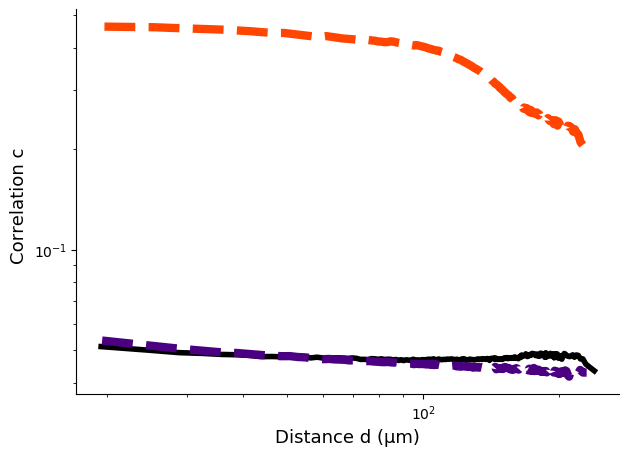

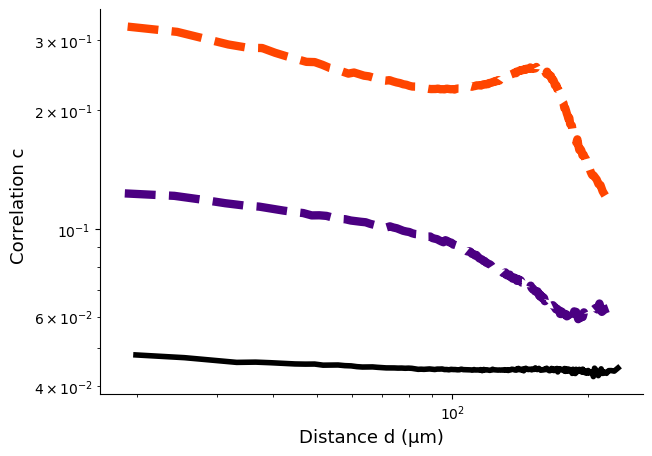

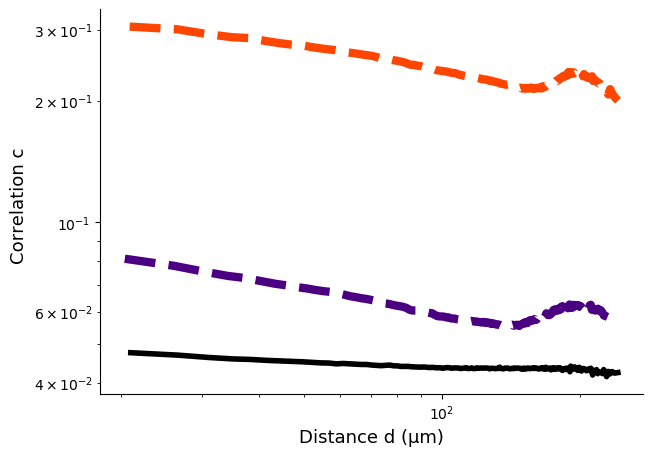

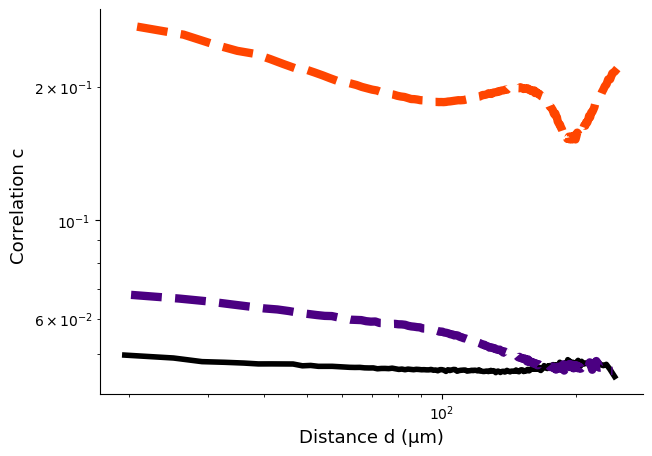

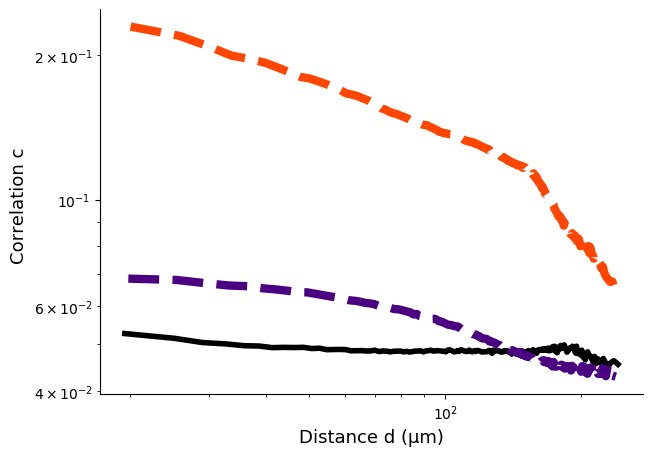

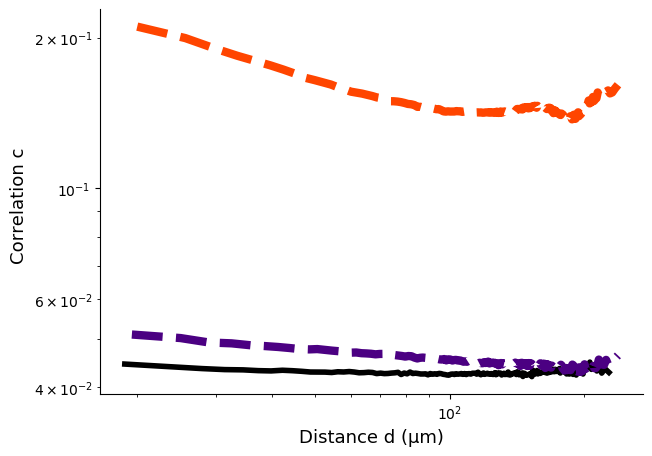

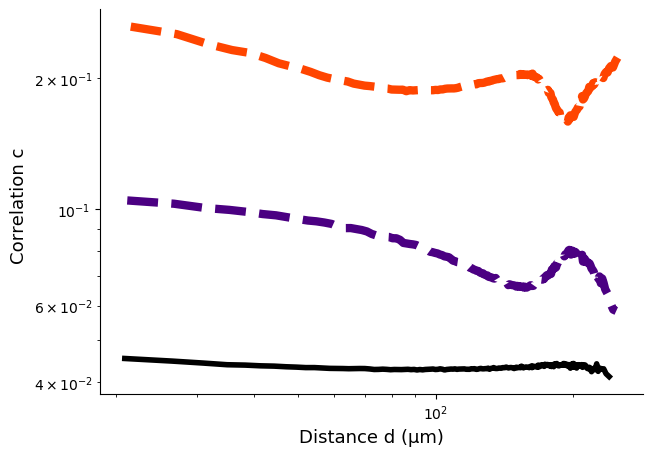

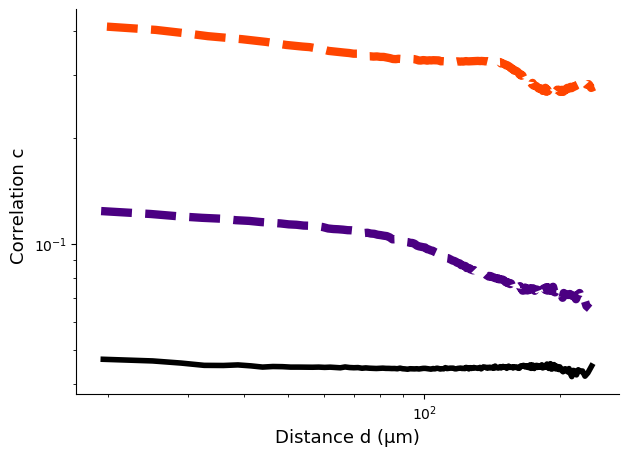

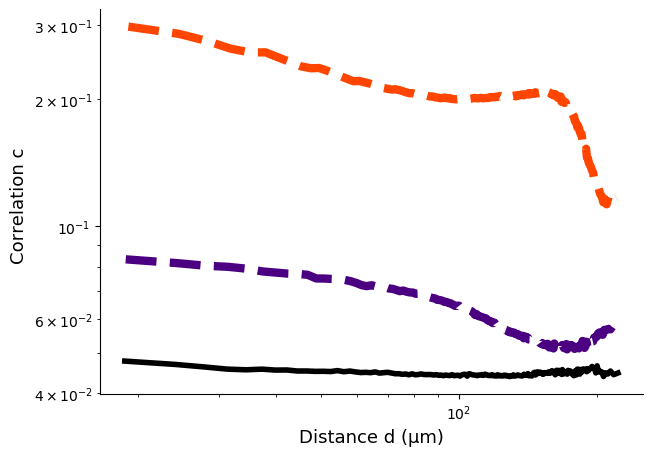

In [111]:
import matplotlib
import powerlaw
from scipy import stats
sns.reset_orig()
num1 = ['02', '04', '05', '07', '08', '09', '10', '11', '12']

blnslope, preslope, p20slope = list(range(9)), list(range(9)), list(range(9))
blncorr, precorr, p20corr = list(range(9)), list(range(9)), list(range(9))

colors = ['black', 'indigo','orangered']
lines = ['-', '--', '--']
widths = [4, 6, 6]
count=0
for i in num1:
    os.chdir(Fdrop + 'Project/' + experiment)
    blnlist = sorted(glob.glob('*E-' + i + '*randbase*-corrdist_bins*'))
    p5list = sorted(glob.glob('*E-' + i + '*preictal*-corrdist_bins*'))
    p20list = sorted(glob.glob('*E-' + i + '*_ictal*-corrdist_bins*'))
    slopelist = [blnslope,preslope,p20slope]
    corrlist = [blncorr,precorr,p20corr]


    plotlist = [blnlist,p5list,p20list]
    fig, axarr = plt.subplots(figsize = (7,5))

    for e in range(len(plotlist)):
        data = np.load(plotlist[e][0])
        xaxis = data[0]*0.8
        yaxis = data[1]
        axarr.plot(xaxis[1:len(xaxis)-1], yaxis[1:len(xaxis)-1], '-', linewidth = widths[e], markersize = 1, alpha = 1, color = colors[e], linestyle = lines[e])
        slopelist[e][count] = -1*stats.linregress(np.log10(xaxis[:len(xaxis)-1][1:150]),np.log10(yaxis[:len(xaxis)-1][1:150]))[0]
        m,c = np.polyfit(np.log10(xaxis[:len(xaxis)-1][1:]), np.log10(yaxis[:len(xaxis)-1][1:]), 1)
        y_fit = 10**(m*(np.log10(xaxis[:len(xaxis)-1])) + c) # calculate the fitted values of y 
        #axarr.plot(xaxis[1:len(xaxis)-1], y_fit[1:len(xaxis)-1], '-', linewidth = 1, markersize = 1, alpha = 1, color ='k', linestyle = '-')
        corrlist[e][count] = np.linalg.norm(yaxis[1:]-y_fit) #stats.pearsonr(yaxis[1:], y_fit)[0]



    count+=1
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.set_xlabel('Distance d (μm)', size = '13')
    axarr.set_ylabel('Correlation c ', size = '13')

    #axarr.set_xticklabels(['100', '100', '100', '100'])
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

In [112]:
#EUCLIDEAN DISTANCe
import pandas as pd

exp = np.zeros((27))
fli = list(range(9))
flist=[]
for i in range(9):
    fli[i] = 'F' + str(i+2)
for e in range(3):
    flist = np.append(flist, fli)

eu_df = pd.DataFrame({"Distance":np.append(corrlist[0],np.append(corrlist[1], corrlist[2])) , "Labels":  np.append(adfn.repeat_list('Baseline',9),np.append(adfn.repeat_list('Pre-ictal',9),adfn.repeat_list('Ictal',9))), "Fish":flist})

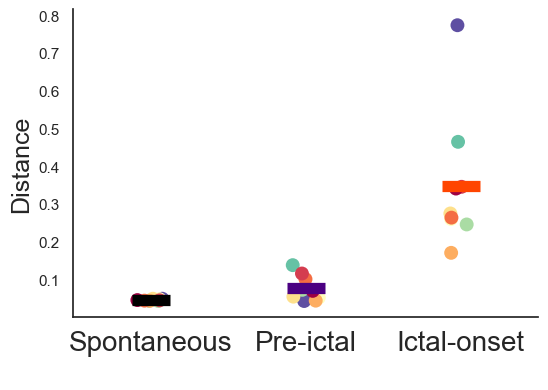

In [116]:
from matplotlib.collections import PathCollection
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,11))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))

colors2 = ['black', 'indigo','orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, hue = 'Labels', palette = colors2, join=True, ci=0, scale=4, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
#ax = sns.pointplot(x="Labels", y="Distance", data = eu_df, color = 'grey', linestyles = ["--"], ci = 0, scale=0.6)
ax = sns.stripplot(x="Labels", y="Distance", data = eu_df, hue = 'Fish', palette = new_colors, size = 10, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Distance', size = '18')
ax.set_xticklabels(['Spontaneous', 'Pre-ictal', 'Ictal-onset'], size = 20)
ax.legend_.remove()
#plt.hlines(1, -0.05 ,2, linestyle = '--', color = 'grey')
#plt.ylim(0.5,1.3)
plt.savefig(Ffig + 'corrdist_eu_trans.svg', transparent = True)
plt.show()